In [36]:
import numpy as np  
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys  
import os
from scipy.signal import find_peaks
from scipy.fft import fft
from scipy import stats
import random
from scipy.stats import norm, binom, poisson, gamma, kstest, ks_2samp, shapiro, anderson, binom_test, hypergeom
import pandas as pd
from statsmodels.stats.weightstats import ztest as ztest
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import LogNorm
from statsmodels.sandbox.stats.runs import runstest_1samp 

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

sys.path.append('External_Functions')

from ExternalFunctions import nice_string_output, add_text_to_ax , Chi2Regression  # Useful functions to print fit results on figure

# I - Distributions and Probabilities

## 1.1

In [328]:
# print(binom_test(x=1, n=2, p=1/5, alternative='greater'))
# 1-binom.cdf(k=0, n=2 , p=1/5)

1-hypergeom.cdf(k=0, M=15, n=3, N=2)

0.37142857142857066

https://www.statology.org/binomial-test-python/#:~:text=We%20could%20perform%20a%20binomial%20test%20to%20answer,the%20following%20syntax%3A%20binom_test%20%28x%2C%20n%3DNone%2C%20p%3D0.5%2C%20alternative%3D%E2%80%99two-sided%E2%80%99%29

In [329]:
#game simulation
iterations=100000
# white=np.array([1,1,1])
# black=np.array([2,2,2,2,2])
# grey=np.array([3,3,3,3,3,3,3])
bag=([1,1,1,2,2,2,2,2,3,3,3,3,3,3,3,])
a=np.zeros(2)
N1=np.zeros(iterations)

p=0
for j in range(0,iterations):            #2 trials of 1000 times
    for i in range (0,2):         #2 trials
        a[i] = random.choice(bag) #pick up a ball
        if a[i]==1:
            N1[j]+=1      #appearances of 1 or more white marbles in 2 trials
p=np.count_nonzero(N1>=1)
prob_winning = p/iterations
print(prob_winning)

0.35956


3


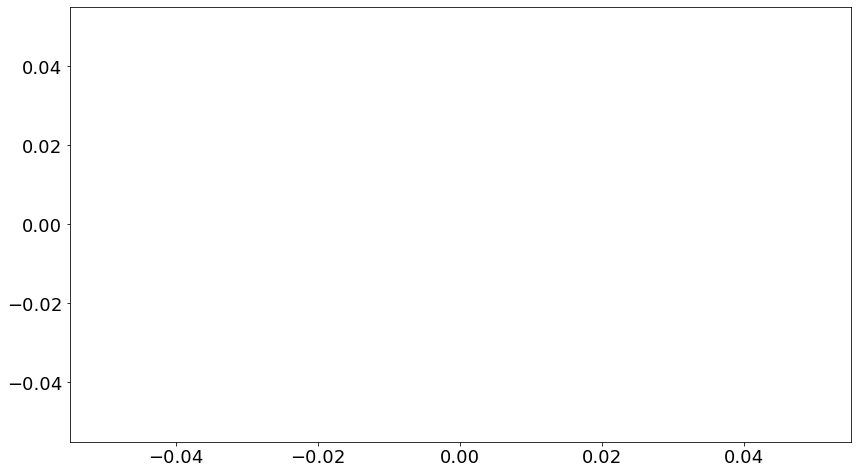

In [330]:
N_experimentsb = 10000           #iterations
N_trialsb = 2                     # Number of trials in each experiment 
p_successb = (1/5)

xminb=-0.5
xmaxb=3

countsb, bin_edgesb = np.histogram(N1, bins= int(np.sqrt(iterations)),  range=(0,3))
bin_centersb = (bin_edgesb[1:] + bin_edgesb[:-1])/2
s_countsb = np.sqrt(countsb)     

# We remove any bins, which don't have any counts in them (for Chi2 fitting):
xb = bin_centersb[countsb>0]
print(len(xb))
yb = countsb[countsb>0]
syb = s_countsb[countsb>0]

fig1, ax1 = plt.subplots(figsize=(14, 8))
#ax1.errorbar(xb, yb, yerr=syb, xerr=0.05, label='Distribution of N$_{3}$', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
#ax1.set(xlim=(xminb, xmaxb), ylim=(0, 1.2*np.max(yb)), xlabel='Number of successes', ylabel='Frequency');
#ax1.hist(N1, bins= int(np.sqrt(iterations)), range=(0, 3), label='Distribution of white marbles following hypergeomtric probability density function');

def func_binomial_pmf(x, N, n, p):
    return N * binom.pmf(x, n, p)

def func_hyper_pmf(x, N, k, M, n, NN):
    return N * hypergeom.pmf(x, k, M, n, NN)


# Minuit.print_level = 1

# chi2_hyper = Chi2Regression(func_hyper_pmf, xb, yb, syb)
# chi2_hyper.errordef = 1
# minuit_hyper = Minuit(chi2_hyper, N=100, k=0, M=15, n=3, NN=2) #   
# minuit_hyper.migrad()          # Perform the actual fit


# Chi2_hyper = minuit_hyper.fval
# Ndof_hyper = len(xb) - 1       # 4 parameters in fit
# Prob_hyper = stats.chi2.sf(Chi2_hyper, Ndof_hyper)
# print(Prob_hyper)
# xaxisb = np.linspace(-0.5, 3, 100000)                  # This way we include all possibilties!
# yaxish = func_hyper_pmf(np.floor(xaxisb+0.5), N=1, k=0, M=15, n=3, NN=2)

# #ax1.plot(xaxisb, yaxish, '-', label=f'Binomial fit: p(Chi2={Chi2_hyper:.1f},Ndof={Ndof_hyper:d}) = {Prob_hyper:.3f}')
xaxish = np.linspace(0,10, 10000)
yaxish = func_hyper_pmf(xaxish, N=1, k=2, M=15, n=3, NN=2)
ax1.plot(xaxish, yaxish, '-', label='Distribution of white marbles following hypergeomtric probability density function')
# ax1.legend()
# fig1


# chi2_bin = Chi2Regression(func_binomial_pmf, xb, yb, syb)
# chi2_bin.errordef = 1
# minuit_bin = Minuit(chi2_bin, N=N_experimentsb, n=N_trialsb, p=p_successb) #   
# minuit_bin.migrad()          # Perform the actual fit


# Chi2_bin = minuit_bin.fval
# Ndof_bin = len(xb) - 3        # 3 parameters in fit
# Prob_bin = stats.chi2.sf(Chi2_bin, Ndof_bin)
# print(Prob_bin)
# xaxisb = np.linspace(-0.5, N_trialsb+0.5, 100000)                  # This way we include all possibilties!
# yaxisb = func_binomial_pmf(np.floor(xaxisb+0.5), *minuit_bin.values[:])

# ax1.plot(xaxisb, yaxisb, '-', label=f'Binomial fit: p(Chi2={Chi2_bin:.1f},Ndof={Ndof_bin:d}) = {Prob_bin:.3f}')
# ax1.legend()





If you pick a marble, record its color, and then put it back 25 times independently, what is
the probability of getting exactly 18 grey marbles? At least 18 grey marbles?

In [651]:
import random as r
r.seed(42)
#game simulation
iterations=1000000
# white=np.array([1,1,1])
# black=np.array([2,2,2,2,2])
# grey=np.array([3,3,3,3,3,3,3])
bag=([1,1,1,2,2,2,2,2,3,3,3,3,3,3,3,])
a=np.zeros(25)
N3=np.zeros(iterations)
print(len(a))
p=0
for j in range(0,iterations):       #25 trials of 1000 times
    for i in range (0,25):         #25 trials
        a[i] = random.choice(bag) #pick up a ball
        if a[i]==3:
            N3[j]+=1      #appearances of 18 or more white marbles in 25 trials
p18=np.count_nonzero(N3=18)
prob_18 = p18/iterations
print(prob_18)

25


TypeError: _count_nonzero_dispatcher() got an unexpected keyword argument 'N3'

In [331]:
print(binom_test(x=18, n=25, p=7/15, alternative ="greater"))
# print(binom.pmf(k=18, n=25 , p=7/15))
# 1-binom.cdf(k=17, n=25 , p=7/15)

0.009282075671551135


$$F(x) = \int_{0}^{500} \frac{1}{\tau} \exp^{-\frac{t}{\tau}} = 0.04$$<br>
$$ \tau = 155.7$$



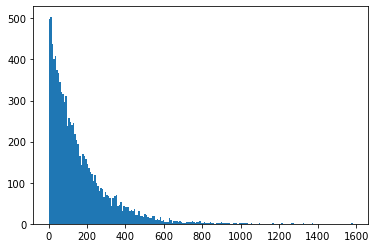

In [7]:
kala = np.random.exponential(155, 10000)
kala1=np.copy(kala)
plt.hist(kala1, bins=200)
plt.show()


### 1.3

In [453]:
poisson.pmf(k=9487, mu=10045)

p9=sum(poisson.pmf(k=[9486,1000000], mu=10045))

glob=1-(1-p9)**1512

print(p9, glob)

5.350706330655116e-10 8.090265024573995e-07


## 1.4

In [620]:
b=binom.pmf(k=100, n=4000, p=0.03)
print(b)

def qbinom(p, n):
    return binom.ppf(p, n, 0.03)
qbinom(0.05, 4000)
 
#print(binom_test(x=100, n=4000, p=0.03, alternative='greater'))

(0.97**19)*0.03

0.00654534637339697


0.016818381740002483

# II - Error propagation

## 2.1

In [332]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)
    
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)


In [333]:
# Defining the parameters for z1,z2:
mu1   =  1.92
sig1  =  0.39
mu2   =  3.1
sig2  =  1.3
rho12 =  0.9  

In [334]:
def myDiff(formula):
    return sqrt((formula.diff(x) * dx)**2 + (formula.diff(y) * dy)**2)

def myDiffWithCorr(formula, name = "", printNow = False):
    dd = sqrt((formula.diff(x) * dx)**2 + (formula.diff(y) * dy)**2 + 2*(formula.diff(x)*formula.diff(y)*(sigCorr**2)))
    if(printNow):
        lprint(latex(Eq(symbols('sigma_'+name), dd)))
    fd = lambdify((x,dx,y,dy,sigCorr),dd)
    return dd, fd

def diff_and_print(formula, name = ""):
    # Calculate uncertainty and print original relation/formula and the uncertainty
    dd = myDiff(formula)
    lprint(latex(Eq(symbols(name),formula)))
    lprint(latex(Eq(symbols('sigma_'+name), dd)))
    
def lambdifyFormula(formula, *args, name = ""):
    # Turn expression into numerical functions 
    f = lambdify((x,y),formula)
    d = myDiff(formula)
    fd = lambdify((x,dx,y,dy),d)
    return f, fd


# Import SymPy: 
from sympy import * 
    
# Define variables:
x,y,z1,z2 = symbols("x, y, z1, z2")
dx,dy,dz1, dz2 = symbols("sigma_x, sigma_y, sigma_z1, sigma_z2")

# Define relations:
# Resistance:
z1 = y/x
z2 = cos(x)*(x/y)

# Try writing a simple function to not repeat yourself! (See cell above)
diff_and_print(z1,"z1")
diff_and_print(z2,"z2")

dz1 = myDiff(z1)
dz2 = myDiff(z2)

# Turn expressions into numerical functions 
fz1, fdz1 = lambdifyFormula(z1,"z1")
fz2, fdz2 = lambdifyFormula(z2,"z2")

# Define values and their errors
vx, vdx = mu1,sig1
vy, vdy = mu2,sig2

# Numerically evaluate expressions and print 
vz1 = fz1(vx,vy)
vdz1 = fdz1(vx,vdx,vy,vdy)
vz2 = fz2(vx,vy)
vdz2 = fdz2(vx,vdx,vy,vdy)

lprint(fr'z1 = ({vz1:.2f} \pm {vdz1:.2f})\,\mathrm{{m}}')

lprint(fr'z2 = ({vz2:.2f} \pm {vdz2:.2f})\,\mathrm{{m}}')



#Adding correlations (and also derivation, printing and lambdifying)
sigCorr = symbols("sigma_xy")
rho = symbols("rho_xy")

dz1, fdz1 = myDiffWithCorr(z1, "z1", True)
dz2, fdz2 = myDiffWithCorr(z2, "z2", True)


sCorr = sqrt(rho*dx*dy)
fSC = lambdify((rho,dx,dy),sCorr)

vSigmaCorr = fSC(rho12,vdx,vdy)

# Numerically evaluate expressions and print 
vdz1 = fdz1(vx,vdx,vy,vdy,vSigmaCorr)
vdz2 = fdz2(vx,vdx,vy,vdy,vSigmaCorr)


lprint(fr'z1 = ({vz1:.2f} \pm {vdz1:.2f})\,\mathrm{{m}}')
lprint(fr'z2 = ({vz2:.2f} \pm {vdz2:.2f})\,\mathrm{{m}}')



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Error separation

In [11]:
def myDiff(formula):
    return (formula.diff(x) * dx) ,  (formula.diff(y) * dy)



def diff_and_print(formula, name = ""):
    # Calculate uncertainty and print original relation/formula and the uncertainty
    dd=np.array(2)
    dd1, dd2 = myDiff(formula)
    lprint(latex(Eq(symbols(name),formula)))
    lprint(latex(Eq(symbols('sigma_'+name+"x"), dd1)))
    lprint(latex(Eq(symbols('sigma_'+name+"y"), dd2)))
    
    

def lambdifyFormula(formula, *args, name = ""):
    # Turn expression into numerical functions 
    f = lambdify((x,y),formula)
    d1, d2 = myDiff(formula)
    fdz2x = lambdify((x,dx, y, dy),d1)
    fdz2y = lambdify((x, dx, y,dy),d2)
    return f, fdz2x, fdz2y

# Import SymPy: 
from sympy import * 
# Define variables:
x,z2,y = symbols("x,z2,y")
dx,dz2x,dy,dz2y = symbols("sigma_x, sigma_z2x, sigma_y, sigma_Ey")

# Define relations:
z2 = cos(x)*(x/y)

# Try writing a simple function to not repeat yourself! (See cell above)
diff_and_print(z2,"z2")

dEx, dEy = myDiff(z2)



# Turn expressions into numerical functions 
fz2,fdz2x,fdz2y = lambdifyFormula(z2,"z2")

# Define values and their errors
vx, vdx = mu1,sig1
vy, vdy = mu2,sig2


# Numerically evaluate expressions and print 
vz2 = fz2(vx,vy)

vdz2x =fdz2x(vx,vdx, vy, vdy)

vdz2y =fdz2y(vx, vdx,vy,vdy)



lprint(fr'z2 = ({vz2:.2f} \pm {vdz2x:.2f} \pm {vdz2y:.2f})\,\mathrm{{m}}')



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## 2.2

In [343]:
drug=np.array([3.7,-1.2,-0.2,0.7,0.8])
placebo=np.array([1.5, -1.0, -0.7, 0.5, 0.1])

#mean
mean_drug=np.mean(drug)
mean_placebo=np.mean(placebo)

#standard deviation
std_drug=np.std(drug)
std_placebo=np.std(placebo)

#uncertainty
err_drug=np.std(drug)/np.sqrt(len(drug))
err_placebo=np.std(placebo)/np.sqrt(len(placebo))

#error on uncertainty
err_err_drug=np.std(drug)/np.sqrt(2*len(drug)-1)
err_err_placebo=np.std(placebo)/np.sqrt(2*len(placebo)-1)

lprint(f'Drug group: (Mean: {mean_drug:.2f} \pm {err_drug:.2f} , std: {std_drug:.2f} \pm {err_err_drug:.2f})')
lprint(f'placebo = (Mean: {mean_placebo:.2f} \pm {err_placebo:.2f},   std: {std_placebo:.2f} \pm {err_err_placebo:.2f})')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [344]:
#check if the data are normally distributed
kstest(drug, 'norm')
#kstest(placebo, 'norm')

KstestResult(statistic=0.35803634777692694, pvalue=0.44056897053768407)

In [345]:
#two-sample t-test one tailed  
stats.ttest_ind(drug, placebo, equal_var=False)

Ttest_indResult(statistic=0.7294558717391544, pvalue=0.4924486548304364)

#### https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy

In [15]:
from scipy.stats import ttest_ind  
def t_test(x,y,alternative='both-sided'):
            _, double_p = ttest_ind(x,y,equal_var = False)
            if alternative == 'both-sided':
                pval = double_p
            elif alternative == 'greater':
                if np.mean(x) > np.mean(y):
                    pval = double_p/2.
                else:
                    pval = 1.0 - double_p/2.
            elif alternative == 'less':
                if np.mean(x) < np.mean(y):
                    pval = double_p/2.
                else:
                    pval = 1.0 - double_p/2.
            return pval

In [16]:
print( "Ho = drug >= placebo and H1 = drug < placebo")
print("p-value for the one-tailed two sample (non equal variances) t-test, with significance level a=0.05 is", t_test(drug,placebo,alternative='greater'))

Ho = drug >= placebo and H1 = drug < placebo
p-value for the one-tailed two sample (non equal variances) t-test, with significance level a=0.05 is 0.2462243274152182


In [17]:
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest as ztest
ztest(drug, placebo, value=0)

(0.7294558717391543, 0.46572285167312744)

### alternative solution

In [18]:
#chauvenet criterion
import numpy as np
import pandas as pd
import os
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.special import erfc
import scipy


def chauvenet(array):
    mean = array.mean()           # Mean of incoming array
    stdv = array.std()            # Standard deviation
    N = len(array)                # Lenght of incoming array
    criterion = 1.0/(2*N)         # Chauvenet's criterion
    d = abs(array-mean)/stdv     # Distance of a value to mean in stdv's
    d /= 2.0**0.5 
    prob = erfc(d)                # Area normal dist.  
    
    return prob >= criterion, prob , criterion      # Use boolean array outside this function


prob= chauvenet(drug)[1]
prob
crit = chauvenet(drug)[2]


probability = np.zeros(len(drug))
index = np.zeros(len(drug))
for i in range(len(prob)):
    prob = chauvenet(drug)[1]
    crit = chauvenet(drug)[2]
    index[i] = i
    if prob[i] <= crit:
        print (prob[i], index[i])

0.0726398011994153 0.0


In [19]:
prob= chauvenet(placebo)[1]
prob
crit = chauvenet(placebo)[2]


probability = np.zeros(len(placebo))
index = np.zeros(len(placebo))
for i in range(len(prob)):
    prob = chauvenet(placebo)[1]
    crit = chauvenet(placebo)[2]
    index[i] = i
    if prob[i] <= crit:
        print (prob[i], index[i])

In [20]:
from scipy.special import erfc
import numpy

def chauvenet(y, mean=None, stdv=None):
    
    
    #-----------------------------------------------------------
    if mean is None:
        mean = y.mean()           # Mean of incoming array y
    if stdv is None:
        stdv = y.std()            # Its standard deviation
    N = len(y)                   # Lenght of incoming arrays
    criterion = 1.0/(2*N)        # Chauvenet's criterion
    d = abs(y-mean)/stdv         # Distance of a value to mean in stdv's
    d /= 2.0**0.5                # The left and right tail threshold values
    prob = erfc(d)               # Area normal dist.    
    filter = prob >= criterion   # The 'accept' filter array with booleans
    return filter                # Use boolean array outside this function


chauvenet(placebo)


array([ True,  True,  True,  True,  True])

In [21]:
# #xf, yf are cleaned versions of x and y and with the valid entries
# #xr, yr are the rejected values from array x and y
# xf = drug[filter]
# yf = placebo[filter]
# xr = drug[~filter]
# yr = placebo[~filter]

# Monte Carlo

## 3.1

In [37]:
1/0.1248

8.012820512820513

$$ \int_{0}^1 f(x) dx = \int_{0}^1 (\dfrac{\left(3{\pi}^2x^2-6\right)\sin\left({\pi}x\right)+\left(6{\pi}x-{\pi}^3x^3\right)\cos\left({\pi}x\right)}{{\pi}^4})' = \frac{1}{C}$$ <br>
$$C=8.013$$<br>

$$ f(x) = 8.013 x^{3}  sin(\pi x) \quad{for} \quad{x} ∈ [0, 1]$$ 

Randomly generated values which follow the function $f(x) = 4x^{3}, x \in [0, 1]$ using the Monte Carlo Transformation Method.

$$f(x) = 4x^{3}, x \in [0, 1]$$<br>
  $$F(x) = \int_{0}^x f(x') dx' = x^{4}$$<br>
  $$F^{-1}(u) = \sqrt[4]u$$


In [38]:
r = np.random
r.seed(42)

N_points = 100000    # Number of random points to be generated

In [39]:
x_trans = (r.uniform(size=N_points))**0.25
y_trans = r.uniform(0, 300*4 * x_trans**3, size=N_points)

Nbins : 316


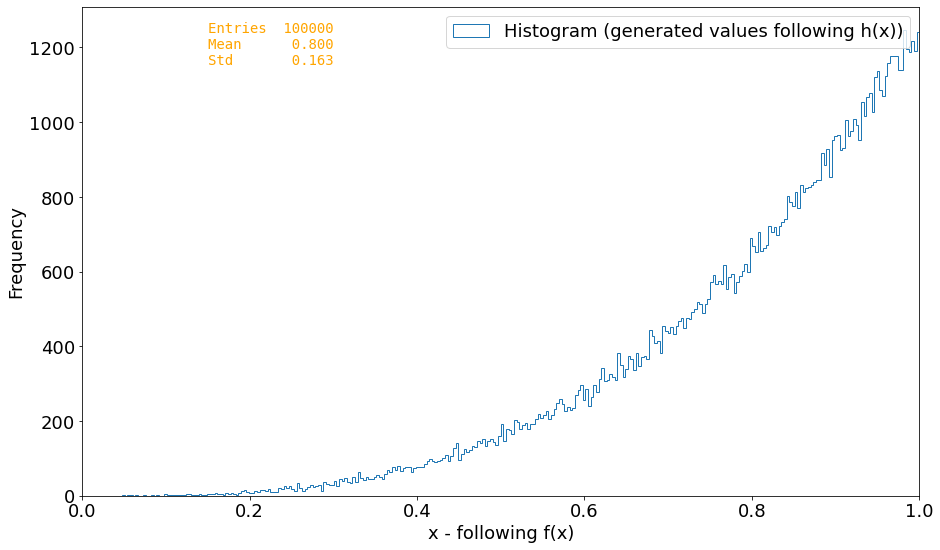

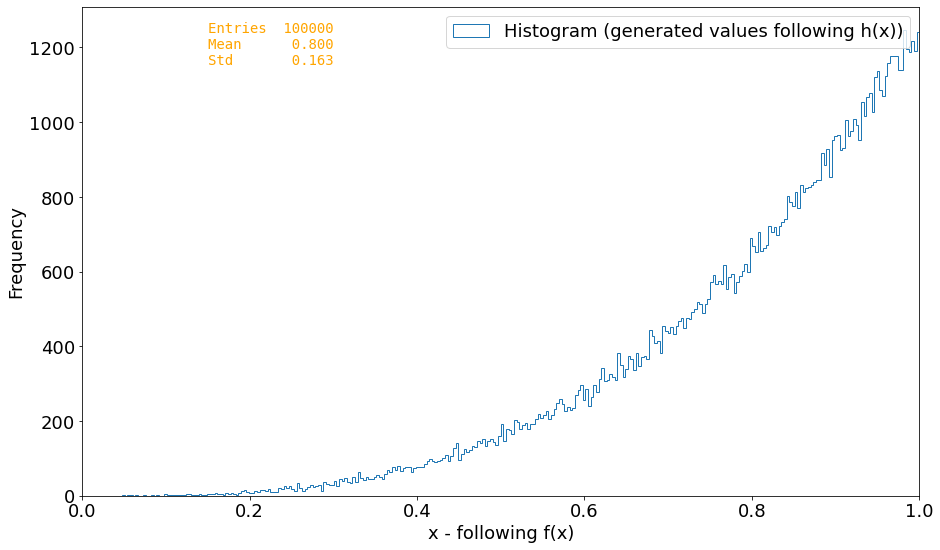

In [40]:
# f(x)
def pol_func(x, N) :
     return N * 4 * x**3

# Define a reasonable range to plot in:
xmin = 0
xmax = 1
Nbins = int(np.sqrt(N_points))
print("Nbins :", Nbins)

# Normalization is N_points * binwidth:
k = (xmax - xmin) / Nbins
N = N_points * k


fig3, ax3 = plt.subplots(figsize=(15, 9))
ax3.hist(x_trans, bins=Nbins, range=(xmin, xmax), histtype='step', label='Histogram (generated values following h(x))' );
ax3.set(xlabel="x - following f(x)", ylabel="Frequency", xlim=(xmin, xmax))


# Define figure text
d = {'Entries': len(x_trans),
     'Mean': x_trans.mean(),
     'Std': x_trans.std(ddof=1),
    }

# Plot figure text
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.15, 0.97, text, ax3, fontsize=14, color="orange")



# Add legend
ax3.legend(loc='best')
fig3
# # Save figure
# if save_plots: 
#     fig.savefig("HistAndFunc_exp.pdf", dpi=600)


0.029102424283529306
<ValueView N=300.0306277106532>


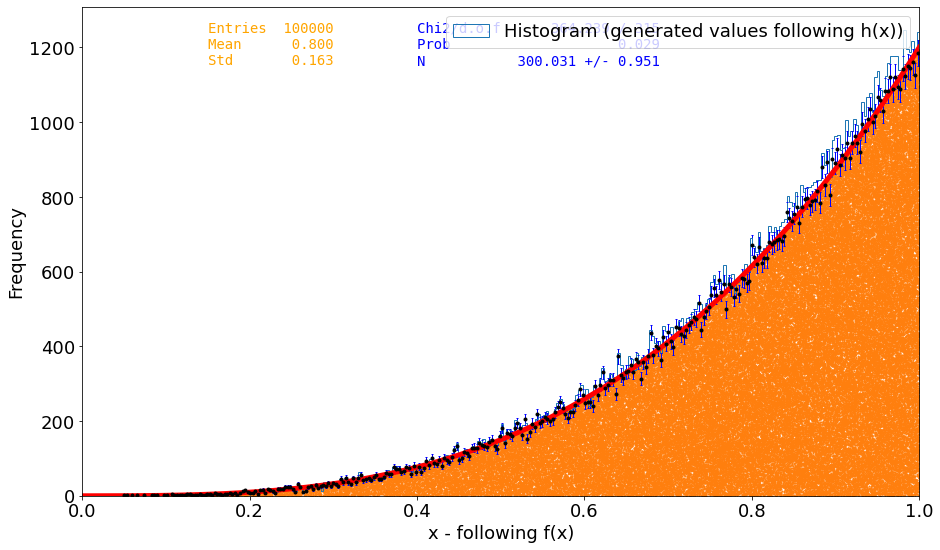

In [41]:
counts, bin_edges = np.histogram(x_trans, bins=Nbins, range=(min(x_trans), max(x_trans)))
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
s_counts = np.sqrt(counts)                         # NOTE: We (naturally) assume that the bin count is Poisson distributed.


# We remove any bins, which don't have any counts in them (for Chi2 fitting):
x = bin_centers[counts>0]
y = counts[counts>0]
sy = s_counts[counts>0]

ax3.errorbar(x, y, yerr=sy, xerr=0.0005,  fmt='.k',  ecolor='blue', elinewidth=1, capsize=1, capthick=1)
#ax4.set(xlim=(xmin, xmax), ylim=(0, 1.2*np.max(y)), xlabel='Ill', ylabel='Frequency');



chi2_pol = Chi2Regression(pol_func, x, y, sy)
chi2_pol.errordef = 1
minuit_pol = Minuit(chi2_pol, 300) #   
minuit_pol.migrad();       # Perform the actual fit
Chi2_pol = minuit_pol.fval
Ndof_pol = len(bin_centers) - 1           # 1 parameters in fit
Prob_pol = stats.chi2.sf(Chi2_pol, Ndof_pol)
print(Prob_pol)

# Plot f(x)
x_axis3 = np.linspace(xmin, xmax, 1000)
y_axis3 = pol_func(x_axis3, *minuit_pol.values[:]) 
ax3.plot(x_axis3, y_axis3, 'r-',linewidth=5);
ax3.scatter(x_trans, y_trans, s=1, label='Generated random values following h(x)')

d2 = {#'Entries'   : "{:d}".format(len(month[:14])),
     'Chi2/d.o.f': "{:.3f} / {:d}".format(Chi2_pol, Ndof_pol),
     'Prob'      : "{:.3f}".format(Prob_pol),
     'N'         : "{:.3f} +/- {:.3f}".format(minuit_pol.values['N'], minuit_pol.errors['N'])}

# Plot figure text
text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.40, 0.97, text2, ax3, fontsize=14, color="blue")

print(minuit_pol.values)
fig3


In [42]:
x_polsin = np.zeros(N_points)
y_polsin = np.zeros(N_points)       # We also save the y-values simply to make an illustrative scatter plot!
Ntry = 0

for i in range(N_points):
    while True:
        Ntry += 1
        x3 = (r.uniform(size=1))**0.25      # Expression for polynomially distributed numbers following the function f(x)=4x^3
        y3 = r.uniform(0, 294*4*x3**3)
        if (y3 < 143*np.sin(np.pi*x3)*8*x3**3):  # If the (x,y)-point fulfills the accept condition...
            break
            
    x_polsin[i] = x3                             # ...then break and accept the x-value
    y_polsin[i] = y3

In [43]:
# h(x)
def polsin_func(x, N, a):
    return N*np.sin(np.pi*x)*8*x**a


countsm, bin_edgesm = np.histogram(x_polsin, bins=650, range=(min(x_polsin), max(x_polsin)))
bin_centersm = (bin_edgesm[1:] + bin_edgesm[:-1])/2
s_countsm = np.sqrt(countsm)                         # NOTE: We (naturally) assume that the bin count is Poisson distributed.


# We remove any bins, which don't have any counts in them (for Chi2 fitting):
xm = bin_centersm[countsm>0]
ym = countsm[countsm>0]
sym = s_countsm[countsm>0]

ax3.errorbar(xm, ym, yerr=sym, xerr=0.0005, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
#ax4.set(xlim=(xmin, xmax), ylim=(0, 1.2*np.max(y)), xlabel='Ill', ylabel='Frequency');



chi2_polsin = Chi2Regression(polsin_func, xm, ym, sym)
chi2_polsin.errordef = 1
minuit_polsin = Minuit(chi2_polsin, 143, 3) #   
minuit_polsin.migrad();       # Perform the actual fit
Chi2_polsin = minuit_polsin.fval
Ndof_polsin = 650 - 2           # 1 parameters in fit
Prob_polsin = stats.chi2.sf(Chi2_polsin, Ndof_polsin)
print(Prob_polsin)
print(minuit_polsin.values)
minuit_polsin.migrad()

0.982126183342262
<ValueView N=143.07825942295216 a=3.028205613588894>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 574.7                      │              Nfcn = 51               │
│ EDM = 4.53e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N    │   143.1   │    0.8    │            │            │         │         │       │
│ 1 │ a    │   3.028   │   0.012   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        N        a │
├───┼───────────────────┤
│ N │    0.634  0.00796 │
│ a │  0.00796 0.000148 │
└───┴───────────────────┘

C:\Users\Giorgos\AppData\Local\Temp/ipykernel_23556/759894807.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax3.plot(x_axis5, y_axis5,'r-', color='b', linewidth = 5,label='Fitted function h(x) = 4x^3')


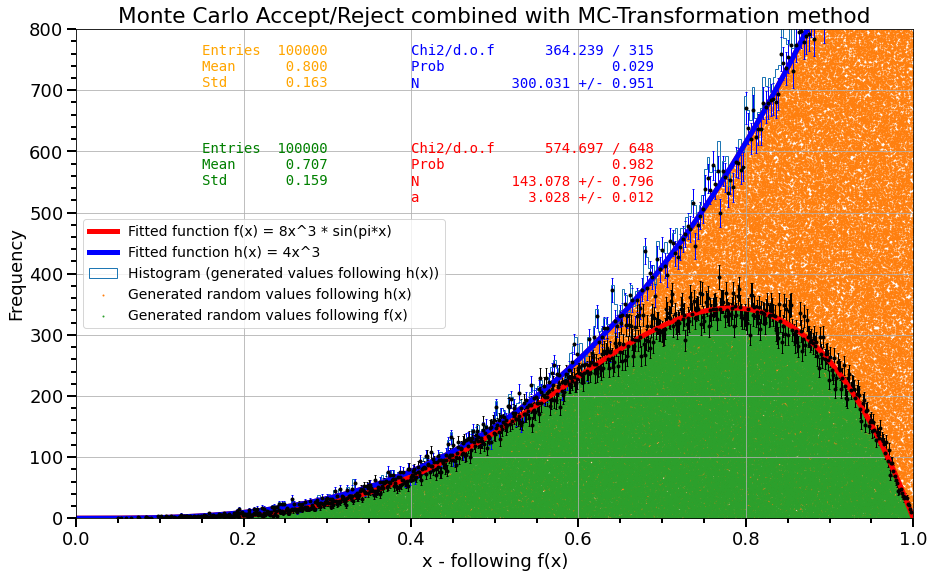

In [44]:
# Distribution of (x,y) points (for illustration) with h(x) and k(x) on top:
ax3.scatter(x_polsin, y_polsin, s=1, label='Generated random values following f(x)')
ax3.set(xlim=(0, 1), ylim=(0, 800))

# Define figure text
d3 = {'Entries': len(x_polsin),
     'Mean': x_polsin.mean(),
     'Std': x_polsin.std(ddof=1),
    }

# Plot figure text
text3 = nice_string_output(d3, extra_spacing=2, decimals=3)
add_text_to_ax(0.15, 0.77, text3, ax3, fontsize=14, color="green")

d4 = {#'Entries'   : "{:d}".format(len(month[:14])),
     'Chi2/d.o.f': "{:.3f} / {:d}".format(Chi2_polsin, Ndof_polsin),
     'Prob'      : "{:.3f}".format(Prob_polsin),
     'N'         : "{:.3f} +/- {:.3f}".format(minuit_polsin.values['N'], minuit_polsin.errors['N']),
     'a'         : "{:.3f} +/- {:.3f}".format(minuit_polsin.values['a'], minuit_polsin.errors['a'])}

# Plot figure text
text4 = nice_string_output(d4, extra_spacing=2, decimals=3)
add_text_to_ax(0.40, 0.77, text4, ax3, fontsize=14, color="red")


# h(x)
def polsin_func(x, N,a):
    return N*np.sin(np.pi*x)*8*x**a

# Plot f(x)
x_axis4 = np.linspace(0, 1, 1000)
y_axis4 = polsin_func(x_axis4, *minuit_polsin.values[:])
ax3.plot(x_axis4, y_axis4,'r-', label='Fitted function f(x) = 8x^3 * sin(pi*x)', linewidth = 5)


# Plot h(x)
x_axis5 = np.linspace(0, 1, 1000)
y_axis5 = pol_func(x_axis5, *minuit_pol.values[:])
ax3.plot(x_axis5, y_axis5,'r-', color='b', linewidth = 5,label='Fitted function h(x) = 4x^3')

ax3.grid()
ax3.set(xlabel='x - following f(x)',
        title='Monte Carlo Accept/Reject combined with MC-Transformation method',  
        ylabel='Frequency')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())


ax3.tick_params(which='both', width=2)
ax3.tick_params(which='major', length=9)
ax3.tick_params(which='minor', length=5)



# # Make figure text
# d3 = {'Entries': len(x_expcos),
#       'Mean x': x_expcos.mean(),
#       'Mean y': y_expcos.mean(),
#       'Std x': x_expcos.std(ddof=1),
#       'Std y': y_expcos.std(ddof=1),
#      }

# # Add figure text
# text3 = nice_string_output(d3, extra_spacing=2, decimals=3)
# add_text_to_ax(0.1, 0.97, text3, ax3, fontsize=14)

# # Add legend
ax3.legend(loc='center left', fontsize=14)
fig3.savefig("monte_carlo.png")
fig3

In [45]:
316*143
45188/100000

0.45188

In [46]:
f  = N_points / Ntry
ef = np.sqrt(f * (1.0-f) / Ntry)

integral3  = 2*8*0.124 * f       # Multiply integral of exponential (k(x)) with fraction
eintegral3 = 2*8*0.124 * ef      # Same for error

print(f"Integral of h(x) = exp(-x/3)*cos(x)^2, x in [0,inf] is:  \t {integral3:7.4f} +- {eintegral3:6.4f}")
print(f"The efficiency of the accept/reject method used here is: \t {f:.2%} +/- {ef:.2%}")

Integral of h(x) = exp(-x/3)*cos(x)^2, x in [0,inf] is:  	  0.9651 +- 0.0022
The efficiency of the accept/reject method used here is: 	 48.64% +/- 0.11%


# IV - Statistical Tests

## 4.1

In [488]:
dataframe = pd.read_csv('data_GripStrength.csv', header=0, index_col=None)
domhand, dom_grip, ndom_grip = dataframe.values.T
dataframe

,DominantHand,DominantGrip(N),NonDominantGrip(N)
0,1.0,293.24,241.50
1,1.0,547.39,552.01
2,0.0,578.85,495.98
3,1.0,342.30,342.18
4,1.0,337.79,347.14
...,...,...,...
79,1.0,335.67,305.39
80,1.0,362.91,336.60
81,1.0,659.39,623.32
82,1.0,292.84,254.46


In [489]:
for i in range(10):
    print(f"  dominant hand = {domhand[i]:4.2f}    dominant grip = {dom_grip[i]:6.2f} N    non-dominant grip = {ndom_grip[i]:6.2f} N")

  dominant hand = 1.00    dominant grip = 293.24 N    non-dominant grip = 241.50 N
  dominant hand = 1.00    dominant grip = 547.39 N    non-dominant grip = 552.01 N
  dominant hand = 0.00    dominant grip = 578.85 N    non-dominant grip = 495.98 N
  dominant hand = 1.00    dominant grip = 342.30 N    non-dominant grip = 342.18 N
  dominant hand = 1.00    dominant grip = 337.79 N    non-dominant grip = 347.14 N
  dominant hand = 0.00    dominant grip = 510.41 N    non-dominant grip = 493.16 N
  dominant hand = 0.00    dominant grip = 188.86 N    non-dominant grip = 212.97 N
  dominant hand = 0.00    dominant grip = 537.67 N    non-dominant grip = 497.41 N
  dominant hand = 0.00    dominant grip = 235.56 N    non-dominant grip = 228.56 N
  dominant hand = 1.00    dominant grip = 217.30 N    non-dominant grip = 218.23 N


In [490]:
fright =len(domhand[domhand==1])/ len(domhand)
print(fright)

error_fright= np.sqrt((fright*(1-fright))/len(domhand))
print(error_fright)

0.8095238095238095
0.042844543373449395


In [491]:
dom_grip_mean = np.mean(dom_grip)
ndom_grip_mean = np.mean(ndom_grip)
dom_grip_std = np.std(dom_grip)
ndom_grip_std = np.std(ndom_grip)
dom_grip_error = np.std(dom_grip)/np.sqrt(83)
ndom_grip_error = np.std(ndom_grip)/np.sqrt(83)
dom_grip_std_error = np.std(dom_grip)/np.sqrt(2*83-1)
ndom_grip_std_error = np.std(ndom_grip)/np.sqrt(2*83-1)


lprint(f'domgrip : mean ={dom_grip_mean:.2f}  \pm {dom_grip_error:.2f}, std= {dom_grip_std:.2f} \pm {dom_grip_std_error:.2f}')
lprint(f'ndomgrip : mean ={ndom_grip_mean:.2f} \pm {ndom_grip_error:.2f},   std= {ndom_grip_std:.2f} \pm{ndom_grip_std_error:.2f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [492]:
#check if the data are normally distributed
kstest(dom_grip, 'norm')
kstest(ndom_grip, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

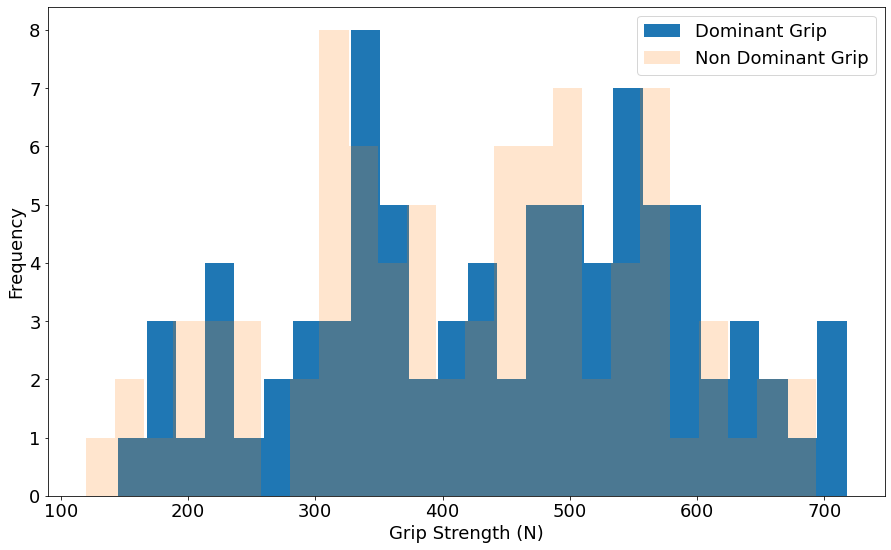

In [500]:
fig4, ax4 = plt.subplots(figsize=(15, 9))
ax4.hist(dom_grip, bins=25, range=(min(dom_grip), max(dom_grip)), label='Dominant Grip' );
ax4.hist(ndom_grip, bins=25, range=(min(ndom_grip), max(ndom_grip)), alpha=0.2, label='Non Dominant Grip' );
ax4.set(xlabel="Grip Strength (N)", ylabel="Frequency")
ax4.legend()
fig4.savefig("dom_ndom_hist")

In [501]:
ks_2samp(dom_grip, ndom_grip)
#print(np.var(dom_grip), np.var(ndom_grip))

KstestResult(statistic=0.13095238095238096, pvalue=0.4696647398566654)

In [497]:
scipy.stats.mannwhitneyu(dom_grip, ndom_grip)

MannwhitneyuResult(statistic=3904.0, pvalue=0.23358235543826855)

In [505]:
scipy.stats.ttest_ind(dom_grip, ndom_grip, alternative="two-sided")

Ttest_indResult(statistic=1.2100636494909534, pvalue=0.22797476192552535)

In [499]:
scipy.stats.ttest_rel(dom_grip, ndom_grip, alternative="two-sided")

Ttest_relResult(statistic=8.299203578908525, pvalue=1.6469976908961237e-12)

In [509]:
ztest(dom_grip, ndom_grip, value=0)

(1.2100636494909534, 0.22625447022608625)

https://www.marsja.se/how-to-perform-a-two-sample-t-test-with-python-3-different-methods/
https://stackoverflow.com/questions/25064506/what-scipy-statistical-test-do-i-use-to-compare-sample-means

In [42]:
dom_right_mean=np.mean(dom_grip[domhand==1])
dom_left_mean=np.mean(dom_grip[domhand==0])
dom_right_std=np.std(dom_grip[domhand==1])
dom_left_std=np.std(dom_grip[domhand==0])
print("dom_right:", dom_right_mean,  "and std:", dom_right_std )
print("dom_left:", dom_left_mean,  "and std:", dom_left_std)


ndom_right_mean=np.mean(ndom_grip[domhand==1])
ndom_left_mean=np.mean(ndom_grip[domhand==0])
ndom_right_std=np.std(ndom_grip[domhand==1])
ndom_left_std=np.std(ndom_grip[domhand==0])
print("ndom_right:", ndom_right_mean, "and std:", ndom_right_std )
print("ndom_left:", ndom_left_mean, "and std:" , ndom_left_std)

dom_right: 447.41823529411766 and std: 144.51941761394573
dom_left: 434.36 and std: 142.04678929845616
ndom_right: 421.8063235294117 and std: 139.90193421385453
ndom_left: 404.35249999999996 and std: 125.19048144228059


In [510]:
grip_strength_individuals= np.mean(abs(dom_grip -ndom_grip))
grip_strength_individuals_std= np.std(abs(dom_grip -ndom_grip))
print(grip_strength_individuals, grip_strength_individuals_std)
grip_strength_individuals_std/ np.sqrt(len(abs(dom_grip -ndom_grip)))
grip_strength_individuals_std/ np.sqrt(2*len(abs(dom_grip -ndom_grip))-1)

31.13011904761905 23.94738699803064


1.853104441756203

In [44]:
fright =len(domhand[domhand==1])/ len(domhand)
print(fright)
fleft =len(domhand[domhand==0])/ len(domhand)
print(fleft)

0.8095238095238095
0.19047619047619047


In [45]:
dom_right_len=len(dom_grip[domhand==1])
dom_left_len=len(dom_grip[domhand==0])

ndom_right_len=len(ndom_grip[domhand==1])
ndom_left_len=len(ndom_grip[domhand==0])

data_fisher = [[dom_left_len, ndom_left_len],
         [dom_right_len, ndom_right_len]]

In [46]:
test = pd.DataFrame({'':['Left=0', 'Right=1'],
    'Dominant': [dom_left_len, ndom_left_len], 
            'Non Dominant': [dom_right_len, ndom_right_len]})
test.set_index('')

,Dominant,Non Dominant
,,
Left=0,16,68
Right=1,16,68


In [47]:
print(stats.fisher_exact(data_fisher))

(1.0, 1.0)


## 4.2

In [531]:
dataframe2 = pd.read_csv('data_MoleculeTypes.csv', header=0, index_col=None)
size, intensity = dataframe2.values.T
dataframe2

,size(microm),intensity
0,45.267,0.800
1,43.549,0.736
2,41.326,0.390
3,26.767,0.281
4,24.066,0.220
...,...,...
981,44.660,0.576
982,41.076,0.744
983,42.454,0.657
984,53.994,0.698


In [553]:
for i in range(10):
    print(f"  size = {size[i]:4.3f} microm    intensity = {intensity[i]:5.3f}")

  size = 45.267 microm    intensity = 0.800
  size = 43.549 microm    intensity = 0.736
  size = 41.326 microm    intensity = 0.390
  size = 26.767 microm    intensity = 0.281
  size = 24.066 microm    intensity = 0.220
  size = 48.232 microm    intensity = 0.766
  size = 27.078 microm    intensity = 0.655
  size = 46.099 microm    intensity = 0.577
  size = 45.537 microm    intensity = 0.543
  size = 44.078 microm    intensity = 0.659


In [554]:
#check if the data are normally distributed
kstest(size, 'norm')

KstestResult(statistic=0.9989858011660531, pvalue=0.0)

In [555]:
shapiro(size)

ShapiroResult(statistic=0.9760385751724243, pvalue=1.1229500836151818e-11)

In [556]:
anderson(size)

AndersonResult(statistic=7.892907151677264, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [557]:
Nbins4 = int(np.sqrt(len(size)))
counts4, bin_edges4 = np.histogram(size, bins=Nbins4, range=(min(size), max(size)))
bin_centers4 = (bin_edges4[1:] + bin_edges4[:-1])/2
s_counts4 = np.sqrt(counts4)                         # NOTE: We (naturally) assume that the bin count is Poisson distributed.

In [558]:
# We remove any bins, which don't have any counts in them (for Chi2 fitting):
x4 = bin_centers4[counts4>0]
y4 = counts4[counts4>0]
sy4 = s_counts4[counts4>0]

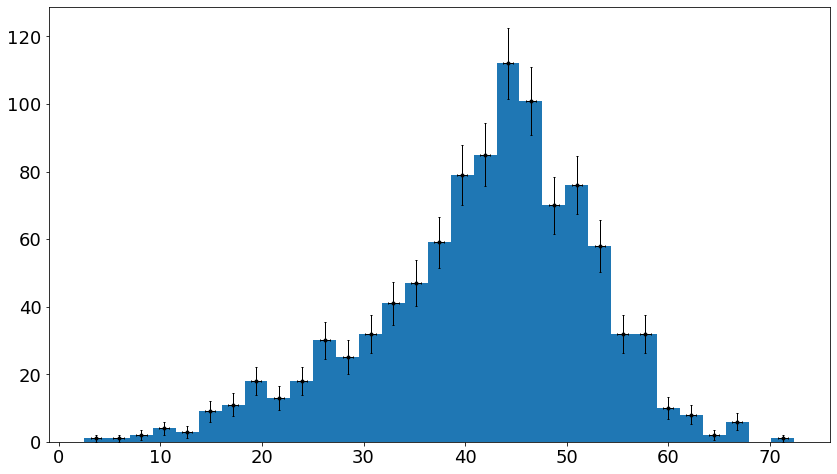

In [559]:
fig42, ax42 = plt.subplots(figsize=(14, 8))
ax42.errorbar(x4, y4, yerr=sy4, xerr=0.5, label='Distribution of Size', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
#ax4.set(xlim=(xmin, xmax), ylim=(0, 1.2*np.max(y)), xlabel='Ill', ylabel='Frequency');

ax42.hist(size, bins=Nbins4, range=(min(size), max(size)));

[2031.428963617677, 42.73571291934266, 9.400002416748755]
41.86215821501015


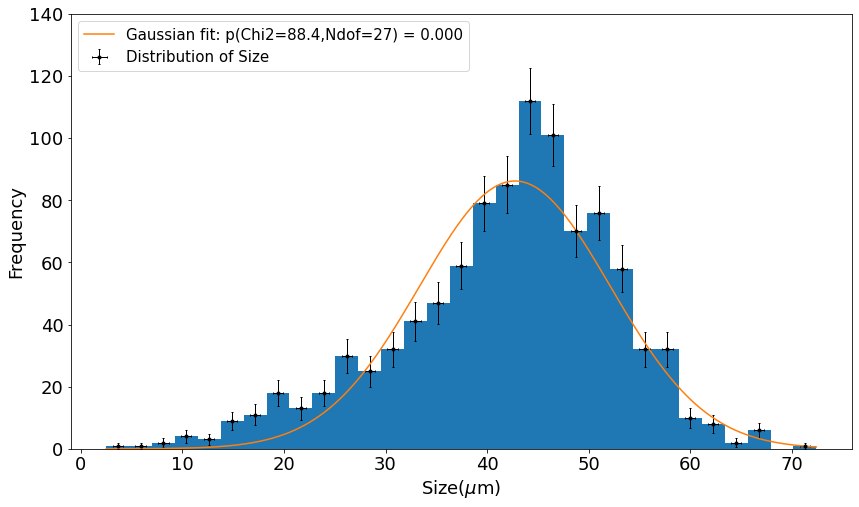

In [560]:
def func_gaussian(x, N, mu, sigma) :
    return N * norm.pdf(x, mu, sigma)

chi2_gaussian = Chi2Regression(func_gaussian, x4, y4, sy4)
chi2_gaussian.errordef = 1
minuit_gaussian = Minuit(chi2_gaussian, N=Nbins4, mu=np.mean(size), sigma=np.std(size)) #   
minuit_gaussian.migrad();       # Perform the actual fit
Chi2_gau = minuit_gaussian.fval
Ndof_gau = len(x4) - 3           # 3 parameters in fit
Prob_gau = stats.chi2.sf(Chi2_gau, Ndof_gau)

xaxis42 = np.linspace(min(size), max(size), 1000)
yaxis42 = func_gaussian(xaxis42, *minuit_gaussian.values[:])
ax42.plot(xaxis42, yaxis42, '-', label=f'Gaussian fit: p(Chi2={Chi2_gau:.1f},Ndof={Ndof_gau:d}) = {Prob_gau:.3f}')
ax42.set(xlabel=f'Size('+r"$\mu \mathrm{m})$", ylabel="Frequency")
ax42.legend(fontsize =15)
ax42.set_ylim(0,140)

print(minuit_gaussian.values[:])
print(np.mean(size))
fig42

In [613]:
size2 = size[intensity>0.5]

In [614]:
Nbins44 = int(np.sqrt(len(size2)))
counts44, bin_edges44 = np.histogram(size2, bins=Nbins44, range=(min(size2), max(size2)))
bin_centers44 = (bin_edges44[1:] + bin_edges44[:-1])/2
s_counts44 = np.sqrt(counts44)                         # NOTE: We (naturally) assume that the bin count is Poisson distributed.

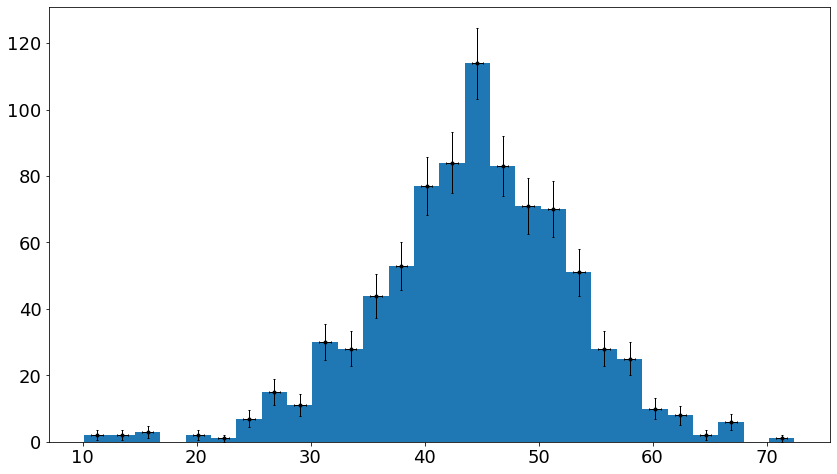

In [615]:
# We remove any bins, which don't have any counts in them (for Chi2 fitting):
x44 = bin_centers44[counts44>0]
y44 = counts44[counts44>0]
sy44 = s_counts44[counts44>0]

fig422, ax422 = plt.subplots(figsize=(14, 8))
ax422.errorbar(x44, y44, yerr=sy44, xerr=0.5, label='Distribution of Size with I > 0.5', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)


ax422.hist(size2, bins=Nbins44, range=(min(size2), max(size2)));

In [612]:
chi2_gaussian2 = Chi2Regression(func_gaussian, x44, y44, sy44)
chi2_gaussian2.errordef = 1
minuit_gaussian2 = Minuit(chi2_gaussian2, N=Nbins44, mu=np.mean(size2), sigma=np.std(size2)) #   
minuit_gaussian2.migrad();       # Perform the actual fit
Chi2_gau2 = minuit_gaussian2.fval
Ndof_gau2 = len(x44) - 3           # 3 parameters in fit
Prob_gau2 = stats.chi2.sf(Chi2_gau2, Ndof_gau2)

xaxis422 = np.linspace(min(size2), max(size2), 1000)
yaxis422 = func_gaussian(xaxis422, *minuit_gaussian2.values[:])
ax422.plot(xaxis422, yaxis422, '-', label=f'Gaussian fit: p(Chi2={Chi2_gau2:.1f},Ndof={Ndof_gau2:d}) = {Prob_gau2:.3f}')
ax422.set(xlabel=f'Size('+r"$\mu \mathrm{m})$", ylabel="Frequency")
ax422.legend(fontsize =15)
ax422.legend()

fig422.savefig("size2.png")

In [608]:
kstest(size2, 'norm')
shapiro(size2)

ShapiroResult(statistic=0.9891678690910339, pvalue=8.557776709494647e-06)

In [586]:
def double_gaussian( x, params ):
    (c1, mu1, sigma1, c2, mu2, sigma2) = params
    res =   c1 * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) ) \
          + c2 * np.exp( - (x - mu2)**2.0 / (2.0 * sigma2**2.0) )
    return res

In [587]:
def d_gaussian(x, N, f, mu1, sigma1, mu2, sigma2) :
    return N* (f*(norm.pdf(x, mu1, sigma1)) +  ((f-1)* norm.pdf(x, mu2, sigma2)))

In [588]:
chi2_gaussiand = Chi2Regression(d_gaussian, x4, y4, sy4)
chi2_gaussiand.errordef = 1
minuit_gaussiand = Minuit(chi2_gaussiand, N=Nbins4, f=1.3, mu1=np.mean(size), sigma1=np.std(size), mu2=np.mean(size), sigma2=np.std(size)) #   
minuit_gaussiand.migrad();       # Perform the actual fit
Chi2_gaud = minuit_gaussiand.fval
Ndof_gaud = len(x4) - 6           # 3 parameters in fit
Prob_gaud = stats.chi2.sf(Chi2_gaud, Ndof_gaud)

xaxis42d = np.linspace(min(size), max(size), 1000)
yaxis42d = d_gaussian(xaxis42d, *minuit_gaussiand.values[:])
ax42.plot(xaxis42d, yaxis42d, '-', label=f'Double Gaussian fit: p(Chi2={Chi2_gaud:.1f},Ndof={Ndof_gaud:d}) = {Prob_gaud:.3f}')
ax42.legend()
ax42.set_ylim(0,200)
print(minuit_gaussiand.values[:])
print(Prob_gaud)
fig42
minuit_gaussiand.migrad()

fig42.savefig("dofsize")

[152.8996790173841, 7.626232390816565, 46.18912680414852, 6.384173714697902, 36.647511635210215, 12.261573821858509]
0.5135372862896252


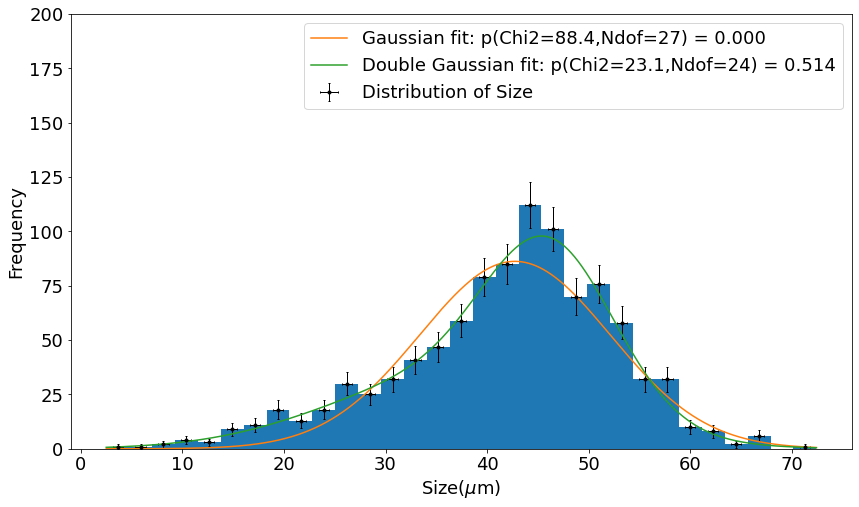

In [569]:
fig42

# V - Fitting Data

In [66]:
dataframeV = pd.read_csv('data_AlgaeGrowth.csv', header=0, index_col=None)
time, area, err_area = dataframeV.values.T
dataframeV

,time(days),area(cm2),err_area(cm2)
0,0.35,1470.40,45.0
1,0.57,1426.93,45.0
2,0.60,1466.84,45.0
3,0.90,1580.44,45.0
4,1.08,1626.27,45.0
...,...,...,...
85,11.71,1974.83,45.0
86,11.85,2044.98,45.0
87,11.93,2059.38,45.0
88,12.26,2014.04,45.0


In [231]:
for i in range(10):
    print(f"  time = {time[i]:4.2f} hrs    area = {area[i]:6.2f} cm2    err_area = {err_area[i]:5.2f} cm2")

  time = 0.35 hrs    area = 1470.40 cm2    err_area = 45.00 cm2
  time = 0.57 hrs    area = 1426.93 cm2    err_area = 45.00 cm2
  time = 0.60 hrs    area = 1466.84 cm2    err_area = 45.00 cm2
  time = 0.90 hrs    area = 1580.44 cm2    err_area = 45.00 cm2
  time = 1.08 hrs    area = 1626.27 cm2    err_area = 45.00 cm2
  time = 1.30 hrs    area = 1624.67 cm2    err_area = 45.00 cm2
  time = 1.51 hrs    area = 1559.46 cm2    err_area = 45.00 cm2
  time = 1.64 hrs    area = 1577.22 cm2    err_area = 45.00 cm2
  time = 1.86 hrs    area = 1626.99 cm2    err_area = 45.00 cm2
  time = 2.03 hrs    area = 1710.10 cm2    err_area = 45.00 cm2


[Text(0.5, 1.0, 'Growth of algae'), Text(0, 0.5, 'Area $(cm^2$)')]

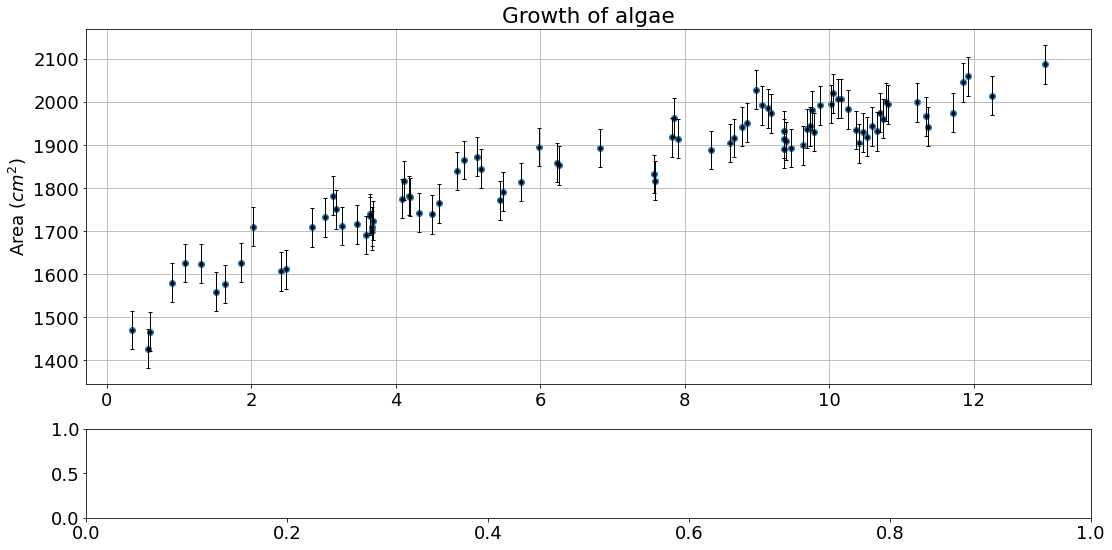

In [232]:
fig5_1, ax5_1 = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]},figsize=(18, 9))
ax5_1[0].scatter(time, area, label='Area of algae')
sigmaA= r"$\sigma_{A}  \pm$ 45"
ax5_1[0].errorbar(time, area, yerr=err_area, xerr=0, label=sigmaA, fmt='.k',  ecolor='k', elinewidth=1, capsize=2, capthick=1)
#ax4.set(xlim=(xmin, xmax), ylim=(0, 1.2*np.max(y)), xlabel='Ill', ylabel='Frequency');
ax5_1[0].grid()
ax5_1[0].set(
        title='Growth of algae',  
        ylabel='Area ' + r"$(cm^2$)")


0.8667833490252134
[0.41399883799314113, -10.869210362372176, 119.54442377815569, 1432.8890756015924]


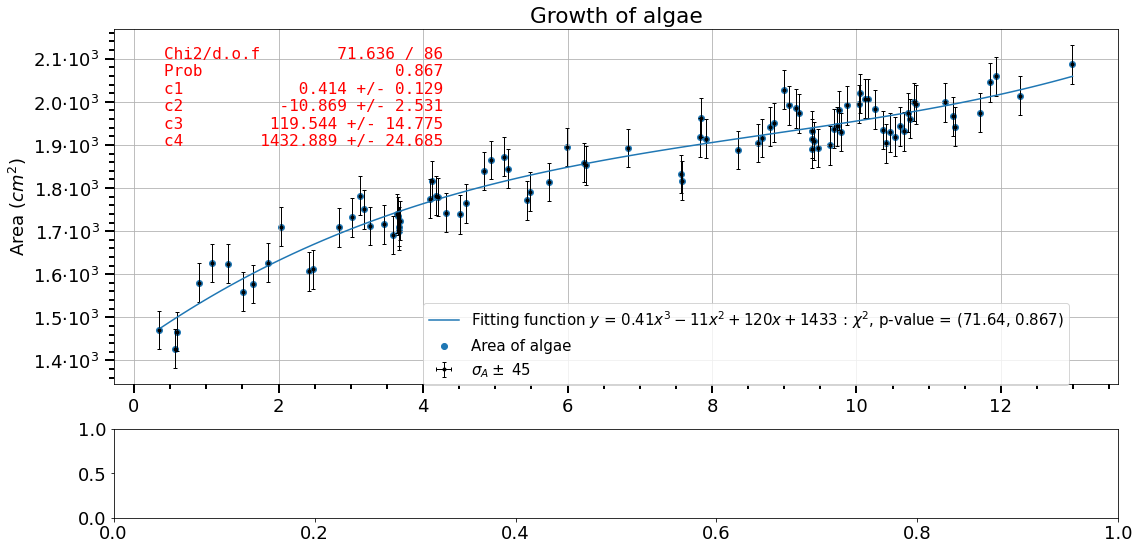

In [233]:
def func_pol3(x, c1, c2, c3,c4) :
    return c1* x**3 + c2*x**2 + c3*x +c4

chi2_pol3 = Chi2Regression(func_pol3, time, area, err_area)
chi2_pol3.errordef = 1
minuit_pol3 = Minuit(chi2_pol3, 0.5,-10,119,1400) #   
minuit_pol3.migrad();       # Perform the actual fit
Chi2_pol3 = minuit_pol3.fval
Ndof_pol3 = len(time) - 4          # 1 parameters in fit
Prob_pol3 = stats.chi2.sf(Chi2_pol3, Ndof_pol3)
print(Prob_pol3)

xaxis_pol3 = np.linspace(min(time), max(time), len(area))
yaxis_pol3 = func_pol3(xaxis_pol3, *minuit_pol3.values[:])
pol3_lab = f'Fitting function '+ r"$y$ = $0.41x^{3} - 11x^{2} + 120x +1433$ : " + r"$\chi^2$, p-value = " + f'{round(Chi2_pol3,2), round(Prob_pol3,3)}'

d = {#'Entries'   : "{:d}".format(len(month[:14])),
     'Chi2/d.o.f': "{:.3f} / {:d}".format(Chi2_pol3, Ndof_pol3),
     'Prob'      : "{:.3f}".format(Prob_pol3),
     'c1'         : "{:.3f} +/- {:.3f}".format(minuit_pol3.values['c1'], minuit_pol3.errors['c1']),
     'c2'         : "{:.3f} +/- {:.3f}".format(minuit_pol3.values['c2'], minuit_pol3.errors['c2']),
     'c3'         : "{:.3f} +/- {:.3f}".format(minuit_pol3.values['c3'], minuit_pol3.errors['c3']),
      'c4'         : "{:.3f} +/- {:.3f}".format(minuit_pol3.values['c4'], minuit_pol3.errors['c4'])}

# text = nice_string_output(d, extra_spacing=2, decimals=3)
# add_text_to_ax(0.02, 0.95, text, ax, fontsize=14) 
    
ax5_1[0].text(0.05, 0.95, nice_string_output(d, 0), family='monospace',transform=ax5_1[0].transAxes, fontsize=16, color='red', verticalalignment='top')


ax5_1[0].plot(xaxis_pol3, yaxis_pol3, '-', label=pol3_lab)
ax5_1[0].legend(bbox_to_anchor=(0.3, 0.25), loc='upper left', fontsize=15)

ax5_1[0].xaxis.set_minor_locator(AutoMinorLocator())
ax5_1[0].yaxis.set_minor_locator(AutoMinorLocator())


ax5_1[0].tick_params(which='both', width=2)
ax5_1[0].tick_params(which='major', length=9)
ax5_1[0].tick_params(which='minor', length=5)



def formatter(area, pos):
    return f'{(area/1000):.1f}' + r"$\cdot$" + r"$10^3$ " 

ax5_1[0].yaxis.set_major_formatter(formatter)
ax5_1[0].yaxis.set_minor_formatter(NullFormatter())

print(minuit_pol3.values[:])
fig5_1
#fig5_1.savefig("5_1_1.png")

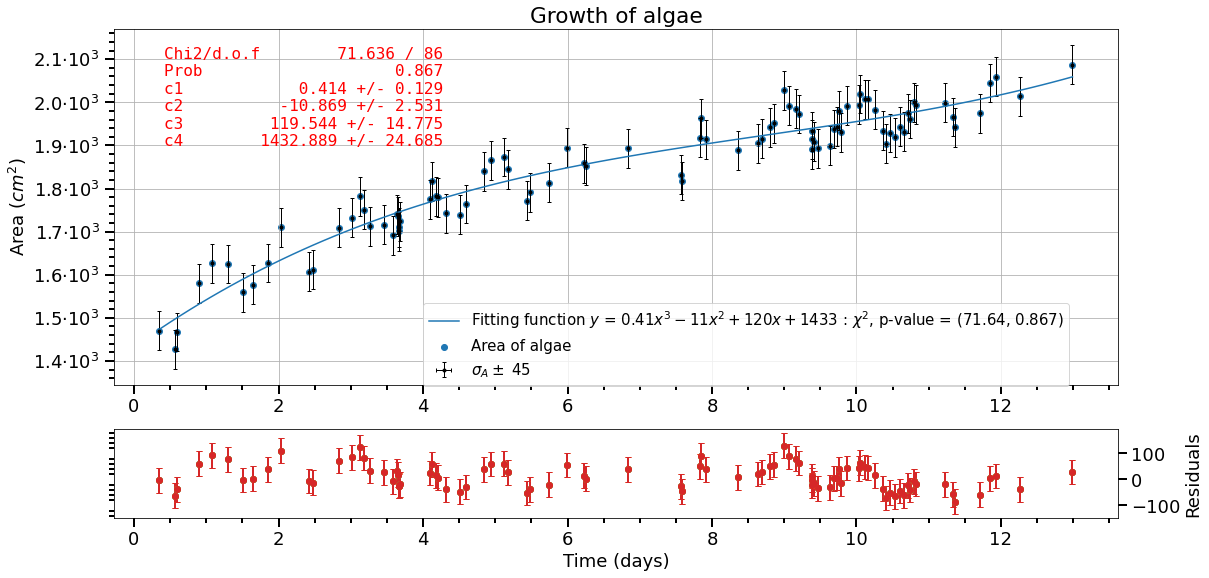

In [235]:
residuals = (area-yaxis_pol3)
stdr= np.std(residuals)#/np.sqrt(len(residuals))

ax5_1[1].grid()

ax5_1[1].plot(time, residuals, 'o',linewidth=1)
ax5_1[1].errorbar(time, residuals, stdr, fmt='o', linewidth=2, capsize=3, label="Residuals")

ax5_1[1].xaxis.set_minor_locator(AutoMinorLocator())
ax5_1[1].yaxis.set_minor_locator(AutoMinorLocator())


ax5_1[1].tick_params(which='both', width=2)
ax5_1[1].tick_params(which='major', length=9)
ax5_1[1].tick_params(which='minor', length=5)
ax5_1[1].set(ylabel= 'Residuals',
        xlabel= 'Time (days)')
ax5_1[1].tick_params(left=False, right=True, labelleft=False, labelright=True)
ax5_1[1].yaxis.set_label_position("right")

fig5_1.savefig("5_1_1.png")
fig5_1

In [238]:
Na=len(residuals[residuals>0]) #points above the curve
Nb=len(residuals[residuals<0]) #points under the curve
Nruns=((2*Na*Nb)/(Na+Nb))+1 #number of runs
Nruns

45.2

In [619]:
runstest_1samp(residuals, cutoff='mean', correction=False) 

(-3.3891886436231777, 0.0007009976714366941)

1.7283016521626833e-20
[0.41399883799314113, -10.869210362372176, 119.54442377815569, 1432.8890756015924]


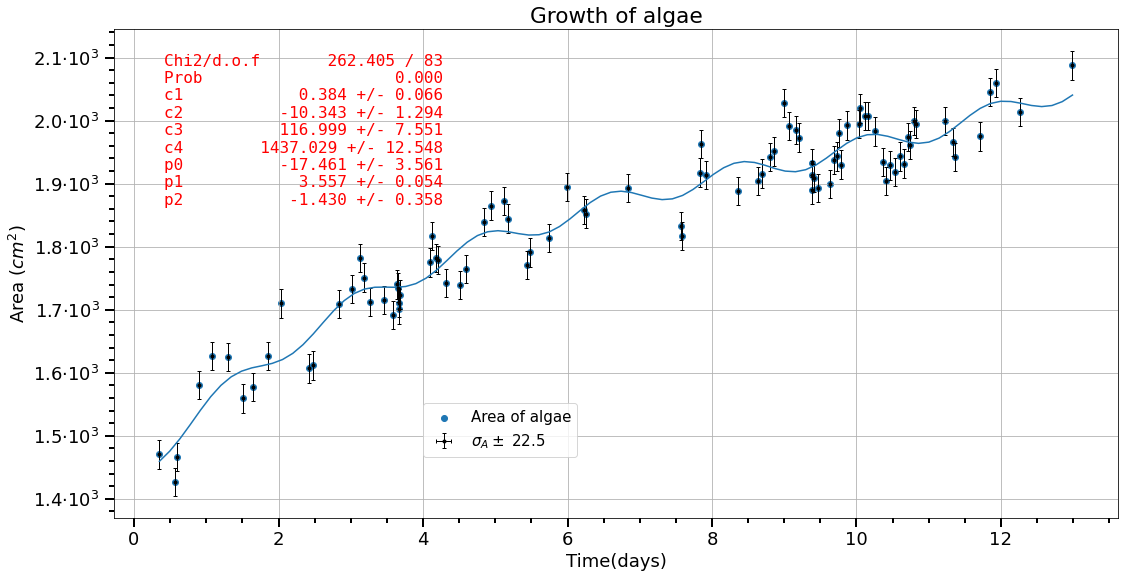

In [644]:
fig5_1_1, ax5_1_1 = plt.subplots(figsize=(18, 9))
ax5_1_1.scatter(time, area, label='Area of algae')
sigmaA= r"$\sigma_{A}  \pm$ 22.5"
ax5_1_1.errorbar(time, area, yerr=22.5, xerr=0, label=sigmaA, fmt='.k',  ecolor='k', elinewidth=1, capsize=2, capthick=1)
#ax4.set(xlim=(xmin, xmax), ylim=(0, 1.2*np.max(y)), xlabel='Ill', ylabel='Frequency');
ax5_1_1.grid()
ax5_1_1.set(
        title='Growth of algae',  
        ylabel='Area ' + r"$(cm^2$)", xlabel='Time(days)')


def func_os(x, c1, c2, c3,c4, p0, p1, p2) :
    return c1* x**3 + c2*x**2 + c3*x +c4 + p0 * np.cos(p1*x+p2)




chi2_os = Chi2Regression(func_os, time, area, 22.5)
chi2_os.errordef = 1
minuit_os = Minuit(chi2_os, 0.5,-10,119,1400,1,4,1) #   
minuit_os.migrad();       # Perform the actual fit
Chi2_os = minuit_os.fval
Ndof_os = len(time) - 7          # 1 parameters in fit
Prob_os = stats.chi2.sf(Chi2_os, Ndof_os)
print(Prob_os)

xaxis_os = np.linspace(min(time), max(time), len(area))
yaxis_os = func_os(xaxis_os, *minuit_os.values[:])
pol3_os = f'Fitting function '+ r"$y$ = $0.41x^{3} - 11x^{2} + 120x +1433$ : " + r"$\chi^2$, p-value = " + f'{round(Chi2_pol3,2), round(Prob_pol3,3)}'

d = {#'Entries'   : "{:d}".format(len(month[:14])),
     'Chi2/d.o.f': "{:.3f} / {:d}".format(Chi2_os, Ndof_os),
     'Prob'      : "{:.3f}".format(Prob_os),
     'c1'         : "{:.3f} +/- {:.3f}".format(minuit_os.values['c1'], minuit_os.errors['c1']),
     'c2'         : "{:.3f} +/- {:.3f}".format(minuit_os.values['c2'], minuit_os.errors['c2']),
     'c3'         : "{:.3f} +/- {:.3f}".format(minuit_os.values['c3'], minuit_os.errors['c3']),
      'c4'         : "{:.3f} +/- {:.3f}".format(minuit_os.values['c4'], minuit_os.errors['c4']),
      'p0'         : "{:.3f} +/- {:.3f}".format(minuit_os.values['p0'], minuit_os.errors['p0']),
     'p1'         : "{:.3f} +/- {:.3f}".format(minuit_os.values['p1'], minuit_os.errors['p1']),
     'p2'         : "{:.3f} +/- {:.3f}".format(minuit_os.values['p2'], minuit_os.errors['p2'])}

# text = nice_string_output(d, extra_spacing=2, decimals=3)
# add_text_to_ax(0.02, 0.95, text, ax, fontsize=14) 
    
ax5_1_1.text(0.05, 0.95, nice_string_output(d, 0), family='monospace',transform=ax5_1_1.transAxes, fontsize=16, color='red', verticalalignment='top')


ax5_1_1.plot(xaxis_os, yaxis_os, '-')
ax5_1_1.legend(bbox_to_anchor=(0.3, 0.25), loc='upper left', fontsize=15)

ax5_1_1.xaxis.set_minor_locator(AutoMinorLocator())
ax5_1_1.yaxis.set_minor_locator(AutoMinorLocator())


ax5_1_1.tick_params(which='both', width=2)
ax5_1_1.tick_params(which='major', length=9)
ax5_1_1.tick_params(which='minor', length=5)



# def formatter(area, pos):
#     return f'{(area/1000):.1f}' + r"$\cdot$" + r"$10^3$ " 

ax5_1_1.yaxis.set_major_formatter(formatter)
ax5_1_1.yaxis.set_minor_formatter(NullFormatter())

print(minuit_pol3.values[:])
fig5_1_1
fig5_1_1.savefig("5_1_1_2_2.png")

## 5.2

In [239]:
dataframeB = pd.read_csv('data_BohrHypothesis.csv', header=0, index_col=None)
wavel, voltage = dataframeB.values.T
dataframeB

,wavelength(nm),voltage(V)
0,2439.703,134.833
1,1276.206,102.063
2,1665.593,98.818
3,1868.467,123.123
4,2075.338,103.849
...,...,...
216540,1761.204,137.935
216541,1748.524,153.508
216542,1555.461,76.994
216543,1367.070,87.436


In [240]:
for i in range(10):
    print(f"  wavelength = {wavel[i]:4.2f} nm    voltage = {voltage[i]:6.2f} V")

  wavelength = 2439.70 nm    voltage = 134.83 V
  wavelength = 1276.21 nm    voltage = 102.06 V
  wavelength = 1665.59 nm    voltage =  98.82 V
  wavelength = 1868.47 nm    voltage = 123.12 V
  wavelength = 2075.34 nm    voltage = 103.85 V
  wavelength = 1962.51 nm    voltage =  96.54 V
  wavelength = 1563.69 nm    voltage =  91.83 V
  wavelength = 1395.86 nm    voltage = 107.95 V
  wavelength = 2112.96 nm    voltage =  74.54 V
  wavelength = 1434.76 nm    voltage = 129.24 V


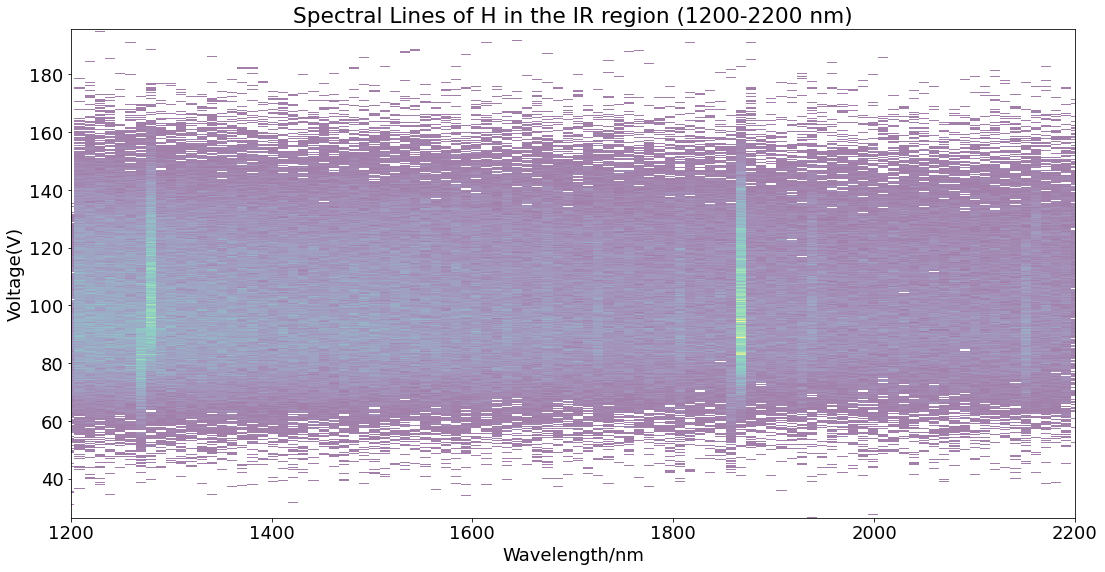

In [645]:
fig5_2, ax5_2 = plt.subplots(figsize=(18, 9))

#ax5_2[0].plot(wavel, voltage, '-')
ax5_2.hist2d(wavel, voltage, bins=int(np.sqrt(len(wavel))), range=[(min(wavel), max(wavel)), (min(voltage),max(voltage))], cmin=1, alpha=0.5);


#ax5_2[0].errorbar(wavel, voltage, yerr=err_area, xerr=0, label=sigmaA, fmt='.k',  ecolor='k', elinewidth=1, capsize=2, capthick=1)
#ax4.set(xlim=(xmin, xmax), ylim=(0, 1.2*np.max(y)), xlabel='Ill', ylabel='Frequency');

ax5_2.set(title='Spectral Lines of H in the IR region (1200-2200 nm)',xlabel='Wavelength/nm', ylabel="Voltage(V)",\
         xlim=(1200, 2200));
fig5_2.savefig("5.2.png")